# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

In [3]:
#import file into a dataframe and display
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


`twitter_archive` columns: 
- **tweet_id**: the unique identifier of each tweet  
- **in_reply_to_status_id**: notes if this tweet is a reply or not  
- **in_reply_to_user_id**: user id of the user who has replied to the tweet
- **timestamp**: timecode for each unique tweet
- **source**: url for each unique tweet
- **text**: content of the tweet  
- **retweeted_status_id**: notes if this tweet is a retweet or not 
- **retweeted_status_id**: user id of the user who has retweeted  
- **retweeted_status_timestamp**: timestamp of the retweet  
- **rating_numerator**: rating in the tweet for a dog  
- **rating_denominator**: represents the denomination of the ranking  
- **name**: name of the dog in the tweet  
- **doggo**: identifies whether this dog is classified as as doggo  
- **floofer**: identifies whether this dog is classified as a floofer  
- **pupper**: identifies whether this dog is a pupper  
- **pupper** identifies whether this dog is a puppo  



2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Download the tsv file from the url. Use get to return the contents of the file we have requested so we can save it to a file. 
image_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(image_url)
r

<Response [200]>

In [5]:
#access the content and write to a file
with open (image_url.split('/')[-1], mode='wb') as file:
    file.write(r.content)
    
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`images_head` columns:  
- **tweet_id**: the unique identifier of each tweet after status   
- **jpg_url**: url to the picture  
- **img_num**: indicates which picture has the highest confidence interval in the prediction  
- **p1**: p1 is the algorithm's #1 prediction for the image in the tweet  
- **p1_conf**: how confident the algorithm is in its #1 prediction
- **p1_dog**: whether or not the #1 prediction is a breed of dog  
- **p2**: algorithm's second most likely prediction  
- **p2_conf**:  how confident the algorithm is in its #2 prediction  
- **p2_dog**:  whether or not the #2 prediction is a breed of dog  
- **p3**: algorithm's third most likely prediction  
- **p3_conf**: how confident the algorithm is in its #3 prediction 
- **p3_dog**: whether or not the #3 prediction is a breed of dog

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#was not able to connect to twitter and will do this step manually.
#read the tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count 

df_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json copy', 'r')as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_json = df_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                             columns=['tweet_id', 'retweet_count', 'favorite_count']))

In [7]:
#See the first lines of df_json dataframe
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819
0,891815181378084864,4328,25461
0,891689557279858688,8964,42908
0,891327558926688256,9774,41048


`df_json` columns:  
- **tweet_id**: the unique identifier of the tweet  
- **retweet_count**: count of how many retweets the original tweet has  
- **favorites_count**: count of how many favorites the original tweet has
 

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
#Use info method to print information about the twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#basic descriptive and statistics for each column
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#Sum of how many duplicated rows the dataframe has
twitter_archive.tweet_id.duplicated().sum()

0

In [11]:
#order rows by values of the tweet_id column
twitter_archive.tweet_id.sort_values()

2355    666020888022790149
2354    666029285002620928
2353    666033412701032449
2352    666044226329800704
2351    666049248165822465
2350    666050758794694657
2349    666051853826850816
2348    666055525042405380
2347    666057090499244032
2346    666058600524156928
2345    666063827256086533
2344    666071193221509120
2343    666073100786774016
2342    666082916733198337
2341    666094000022159362
2340    666099513787052032
2339    666102155909144576
2338    666104133288665088
2337    666268910803644416
2336    666273097616637952
2335    666287406224695296
2334    666293911632134144
2333    666337882303524864
2332    666345417576210432
2331    666353288456101888
2330    666362758909284353
2329    666373753744588802
2328    666396247373291520
2327    666407126856765440
2326    666411507551481857
               ...        
29      886366144734445568
28      886680336477933568
27      886736880519319552
26      886983233522544640
25      887101392804085760
24      887343217045368832
2

In [12]:
#get counts of unique values in the name column
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Toby           7
Buddy          7
an             7
Bailey         7
Dave           6
Jack           6
Oscar          6
Koda           6
Rusty          6
Leo            6
Scout          6
Milo           6
Bella          6
Jax            6
Stanley        6
Finn           5
            ... 
Mauve          1
Duddles        1
Stewie         1
Jarod          1
Aqua           1
Swagger        1
Carll          1
Eriq           1
Combo          1
Kirk           1
Akumi          1
Hermione       1
Pepper         1
Emanuel        1
Daniel         1
Ralf           1
Danny          1
Shadoe         1
Hall           1
Tug            1
Banditt        1
Maxwell        1
Dewey          1
Boots          1
Chloe          1
Ron            1
Alejandro      1
Cilantro      

In [13]:
#sort values from high to low on the rating denominator column to identify if there are cases where the rating denominator is higher than 10
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [14]:
#count how many rows each rating denominator value has
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
#count how many rows each rating numerator value has
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
#count how many rows each url value has
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/775733305207554048/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [17]:
##Use info method to print information about the images dataframe
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# number of distinct values in the images dataframe
images.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [19]:
#checking for quality issues in the images dataframe.
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [20]:
#Use info method to print information about the df_json dataframe
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


In [21]:
#see if there are any values in the tweet_id column without info
sum(df_json.tweet_id.isnull())

0

### Quality issues
1. **twitter_archive table**:  
`tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` , `retweeted_status_user_id` are floats 

2. **twitter_archive table**:  
`rating_denominator` includes 0 values

3. **twitter_archive table**:  
`name` column: contains non valid names such as None, a, the, very, an

4. **twitter_archive table**:  .
`tweet_id` includes retweets and we want only the original tweets.

5. **twitter_archive table**:  
`timestamp` column: considered as object

6. **images table**:  
`p1_dog` column included false predictions  

7. **twitter_archive table**:  
`expanded_url` column has multiple sources separated by a comma
8. **images dataframe**:  
  removing innacurate names from `p1` column 





### Tidiness issues
1.**twitter_archive table**:
the different dog stages can be combined into one columns(visual assesment)

2.**Merging of all three datasets based on the individual tweet id in the df_json**

## Cleaning Data


In [22]:
# Make copies of original pieces of data
twitter_clean = twitter_archive.copy()
images_clean = images.copy()
df_json_clean = df_json.copy()

### Issue #1: **twitter_archive table**:  
`tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` , `retweeted_status_user_id` are floats 


#### Define: Use the astype method to change these columns from floats to strings as we will not perform any mathematical operations. 

#### Code

In [23]:
#use astype to change from floats to strings
twitter_clean = twitter_clean.astype({'tweet_id':'object','in_reply_to_status_id':'object', 'in_reply_to_user_id':'object', 'retweeted_status_id':'object', 'retweeted_status_user_id':'object'})


### Test

In [24]:
#confirm that the dtypes have been changed
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)
memory

### Issue #2: rating denominator includes 0 values


#### Define: select all the tweets that that have 0 in the `rating_denominator` column and drop them.

#### Code

In [25]:
#find all the tweets that have 0 in the rating denominator
zero_denominator = twitter_clean[twitter_clean.rating_denominator == 0.000000]
zero_denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35246e+17,2.62596e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [26]:
#drop the row that has 0 as denominator
twitter_clean = twitter_clean.drop(labels=313,axis=0)

### Test

In [27]:
#find all the tweets that have 0 in the rating denominator
zero_denominator = twitter_clean[twitter_clean.rating_denominator == 0.000000]
zero_denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: **twitter_archive table**:  
`name` column: contains non valid names such as None, a, the, very, an

#### Define: find all non valid names and drop them

### Code

In [28]:
#find amount of rows in twitter_clean df
twitter_clean.shape

(2355, 17)

In [29]:
#find all non valid dog names
non_names = twitter_clean[twitter_clean.name.str[0].str.islower()]
non_names.name

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

In [30]:
#use index to drop the 109 rows with non valid dog names 
non_names = twitter_clean[twitter_clean.name.str[0].str.islower()].index

In [31]:
#drop the 109 rows from the twitter_clean df
twitter_clean.drop(non_names, inplace=True)


In [32]:
#Find rows with dog names None
name_none = twitter_clean[twitter_clean.name == 'None']
name_none.name.value_counts()

None    744
Name: name, dtype: int64

In [33]:
#use index to drop the 744 rows with dod names None
name_none = twitter_clean[twitter_clean.name == 'None'].index

In [34]:
#drop the 744 rows from the twitter_clean df
twitter_clean.drop(name_none, inplace=True)

### Test

In [35]:
#confirm that the 853 rows have been removed
twitter_clean.shape

(1502, 17)

### Issue #4: **twitter_archive table**:  
`tweet_id` includes retweets and we want only the original tweets.

#### Define: find the rows with retweets in the following columns and drop them. Also, remove the columns from the dataframe:   
- retweeted_status_id	
- retweeted_status_user_id  
- retweeted_status_timestamp

### Code

In [36]:
#removing the retweets in the retweeted_status_id column
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]




In [37]:
#removing the retweets in the retweeted_status_user_id column
twitter_clean = twitter_clean[twitter_clean.retweeted_status_user_id.isnull()]

In [38]:
#removing the retweets in the retweeted_status_timestamp
twitter_clean = twitter_clean[twitter_clean.retweeted_status_timestamp.isnull()]

In [39]:
#checking twitter_clean to see if the 181 lines have been removed
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1391 non-null object
in_reply_to_status_id         1 non-null object
in_reply_to_user_id           1 non-null object
timestamp                     1391 non-null object
source                        1391 non-null object
text                          1391 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1391 non-null object
rating_numerator              1391 non-null int64
rating_denominator            1391 non-null int64
name                          1391 non-null object
doggo                         1391 non-null object
floofer                       1391 non-null object
pupper                        1391 non-null object
puppo                         1391 non-null object
dtypes: int64(2), object(15)
memory usage: 

In [40]:
#drop the three columns as we no longer need them
twitter_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

### Test

In [41]:
#confirm that the columns have been removed
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id                 1391 non-null object
in_reply_to_status_id    1 non-null object
in_reply_to_user_id      1 non-null object
timestamp                1391 non-null object
source                   1391 non-null object
text                     1391 non-null object
expanded_urls            1391 non-null object
rating_numerator         1391 non-null int64
rating_denominator       1391 non-null int64
name                     1391 non-null object
doggo                    1391 non-null object
floofer                  1391 non-null object
pupper                   1391 non-null object
puppo                    1391 non-null object
dtypes: int64(2), object(12)
memory usage: 163.0+ KB


### Issue #5: **twitter_archive table**:  
timestamp column: considered as object

#### Define: convert timestampo  column from object to datetime using the to_datetime() method.

### Code

In [42]:
#use to_datetime to convert to datetime
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

### Test

In [43]:
#confirm the change of dtype
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id                 1391 non-null object
in_reply_to_status_id    1 non-null object
in_reply_to_user_id      1 non-null object
timestamp                1391 non-null datetime64[ns]
source                   1391 non-null object
text                     1391 non-null object
expanded_urls            1391 non-null object
rating_numerator         1391 non-null int64
rating_denominator       1391 non-null int64
name                     1391 non-null object
doggo                    1391 non-null object
floofer                  1391 non-null object
pupper                   1391 non-null object
puppo                    1391 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 163.0+ KB


### Issue #6: **images** table:  
p1_dog column included false predictions

#### Define: identify the p1_dog predictions that are false and remove them

#### Code

In [44]:
#identify if there are false predictions
images_clean['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [45]:
#keep only the predictions that are true
images_clean = images_clean.loc[images_clean['p1_dog'] == True]


### Test

In [46]:
#check that there are no false predictions in the dataframe
images_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #7: **twitter_archive** table:  
`expanded_url` column has multiple sources separated by a comma

#### Define: split the two urls into two columns and keep the first column.

#### Code

In [47]:
#create a list from the string using "," as separator and get the first element only
# select non-nan rows
mask=~twitter_clean['expanded_urls'].isna()
# use only those rows
# .loc[ ] will select only the True rows from mask
twitter_clean.loc[mask,'url'] = twitter_clean.loc[mask,'expanded_urls'].apply(lambda x: x.split(",")[0])




### Test

In [48]:
twitter_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/690649993829576704/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/789628658055020548/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/811985624773361665/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/707776935007539200/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1                                                                    1
https://twitter

### Issue #8: **images** table:  
convert the whole `p1`column to lower case letters


#### Define: Convert column values to lowercase using str.lower()

In [49]:
#Convert the column values to lower case
images_clean['p1'] = images_clean['p1'].apply(str.lower)

#### Test

In [50]:
#validate the result
images_clean.p1.value_counts()

golden_retriever               150
labrador_retriever             100
pembroke                        89
chihuahua                       83
pug                             57
chow                            44
samoyed                         43
toy_poodle                      39
pomeranian                      38
malamute                        30
cocker_spaniel                  30
french_bulldog                  26
miniature_pinscher              23
chesapeake_bay_retriever        23
siberian_husky                  20
german_shepherd                 20
staffordshire_bullterrier       20
cardigan                        19
shetland_sheepdog               18
beagle                          18
eskimo_dog                      18
maltese_dog                     18
lakeland_terrier                17
rottweiler                      17
shih-tzu                        17
italian_greyhound               16
kuvasz                          16
great_pyrenees                  14
west_highland_white_

### Tidiness issues
1.**twitter_archive table**:
the different dog stages can be combined into one columns(visual assesment)


### Code

In [51]:
#create a new column in the twitter_clean dataframe named Dog stages and extract the four dog stages 
twitter_clean['dog_stages'] = twitter_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [52]:
#drop the columns doggo,floofer,pupper and puppo from the twitter_clean df
twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

### Test

In [53]:
#confirming that the columns have been dropped and that new column has been created
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id                 1391 non-null object
in_reply_to_status_id    1 non-null object
in_reply_to_user_id      1 non-null object
timestamp                1391 non-null datetime64[ns]
source                   1391 non-null object
text                     1391 non-null object
expanded_urls            1391 non-null object
rating_numerator         1391 non-null int64
rating_denominator       1391 non-null int64
name                     1391 non-null object
url                      1391 non-null object
dog_stages               188 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 141.3+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
#First we need to merge the twitter_clean with df_json clean dataframes 
twitter_archive_draft = pd.merge(twitter_clean, df_json_clean, on = ['tweet_id'], how = 'left')

In [55]:
#now we need to merge with the images_clean dataframe but we need to change the type of the tweet_id column in the images_clean
#dataframe from integers to object as the other dataframes
images_clean = images_clean.astype({'tweet_id':'object'})



In [56]:
#check that the conversion has been made
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 124.2+ KB


In [57]:
#merge images clean with twitter_archive_master
twitter_archive_master = pd.merge(twitter_archive_draft, images_clean, on = ['tweet_id'], how = 'left')

In [58]:
#check output
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1390
Data columns (total 25 columns):
tweet_id                 1391 non-null object
in_reply_to_status_id    1 non-null object
in_reply_to_user_id      1 non-null object
timestamp                1391 non-null datetime64[ns]
source                   1391 non-null object
text                     1391 non-null object
expanded_urls            1391 non-null object
rating_numerator         1391 non-null int64
rating_denominator       1391 non-null int64
name                     1391 non-null object
url                      1391 non-null object
dog_stages               188 non-null object
retweet_count            0 non-null object
favorite_count           0 non-null object
jpg_url                  1044 non-null object
img_num                  1044 non-null float64
p1                       1044 non-null object
p1_conf                  1044 non-null float64
p1_dog                   1044 non-null object
p2                      

## Analyzing and Visualizing Data


### Insights:
1.Which dog name is the most popular one?

2.Who is the most popular according to ratings?

3.Which dog status has the most tweets?

4.Which dog stage is most popular based on the ratings?


### 1. Which dog name is the most popular?

In [59]:
#Use count to view the amount of names
twitter_archive_master['name'].value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Lola          8
Daisy         7
Toby          7
Koda          6
Bailey        6
Jax           6
Bo            6
Oscar         6
Bella         6
Stanley       6
Chester       5
Louis         5
Leo           5
Scout         5
Bentley       5
Dave          5
Milo          5
Rusty         5
Buddy         5
Archie        4
Scooter       4
Cassie        4
             ..
Swagger       1
Kane          1
Brady         1
Flurpson      1
Crumpet       1
Shadoe        1
Ralf          1
Daniel        1
Dotsy         1
Strider       1
Boston        1
Rooney        1
Karll         1
Dido          1
Stephanus     1
Crouton       1
Bertson       1
Caryl         1
Ken           1
Emanuel       1
Sonny         1
Jazz          1
Emmie         1
Hamrick       1
Eriq          1
Kirk          1
Akumi         1
Hermione      1
Pepper        1
Jerome        1
Name: name, Length: 930,


#### The most popular dog names are Charlie and Lucy.



### 2. Which dog is most popular on WeRateDogs based on the rating?

In [64]:
#Identify the row in the dataframe with the highest rating numerator and access the text to identify the name of the dog.
twitter_archive_master[twitter_archive_master.rating_numerator == twitter_archive_master.rating_numerator.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
587,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



#### The most popular dog on the website is Atticus.


### 3. Which dog stage has the most tweets?

In [65]:
#Use count to calculate how many unique tweets are connected to each dog stage.
twitter_archive_master.groupby('dog_stages')['tweet_id'].agg('count').sort_values(ascending=False)

dog_stages
pupper     125
doggo       41
puppo       20
floofer      2
Name: tweet_id, dtype: int64


#### The dog status with most tweets is the Pupper.

### Visualization


### What is the average rating per dog stage?




In [62]:
#Group by dog stage and get average for the ratings and sort them in descending order
average_dog = twitter_archive_master.groupby('dog_stages')['rating_numerator'].mean().sort_values(ascending=False)
average_dog

dog_stages
floofer    12.500000
puppo      11.950000
doggo      11.756098
pupper     10.328000
Name: rating_numerator, dtype: float64

Text(0,0.5,'Average rating')

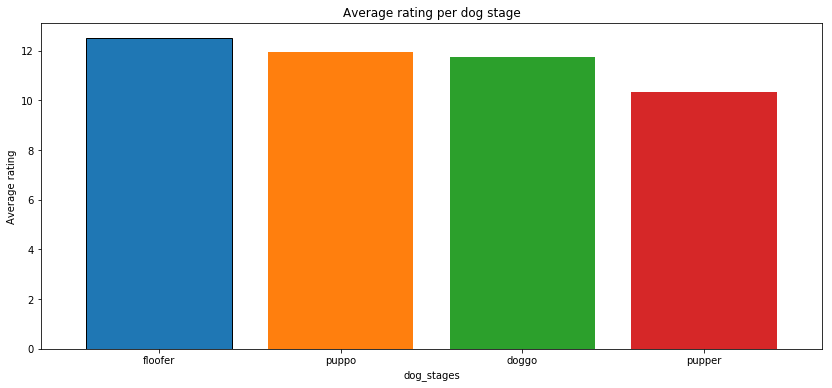

In [63]:
#Create a plot bar showing the average rating per dog stage as well as inserting title and label for the y axis
average_dog.plot.bar(edgecolor='black',figsize=[14, 6],rot=0,width=0.8);

plt.title('Average rating per dog stage')
plt.ylabel('Average rating')

The average dog ratings per dog stage indicate that all dog stages have an average of over 10.